In [253]:
import pandas as pd
import glob

In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
#List of four specific file paths
file_paths = [
    "/content/drive/MyDrive/Datasets_FYP/2021_sales_data.csv",
    "/content/drive/MyDrive/Datasets_FYP/2022_sales_data.csv",
    "/content/drive/MyDrive/Datasets_FYP/2023_sales_data.csv",
    "/content/drive/MyDrive/Datasets_FYP/2024_sales_data.csv"

]

In [319]:
#Load and merge the four files
df_sales = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

In [257]:
# Convert and clean 'Order date' in df_sales
df_sales["Order date"] = pd.to_datetime(df_sales["Order date"], format="%d/%m/%Y", errors="coerce")

In [258]:
# Load weather data
df_weather = pd.read_csv("/content/drive/MyDrive/Datasets_FYP/weather_data .csv")

In [259]:
# Rename 'date' column to 'Order date' for consistency
df_weather.rename(columns={"date": "Order date"}, inplace=True)

In [260]:
# Convert 'Order date' to Datetime
df_weather["Order date"] = pd.to_datetime(df_weather['Order date'])

In [261]:
# Load Inflation Data
df_inflation = pd.read_csv("/content/drive/MyDrive/Datasets_FYP/Inflation_Data.csv")

In [262]:
# Rename 'date' column to 'Order date'
df_inflation.rename(columns={"Date": "Order date"}, inplace=True)

In [263]:
# Convert "Order date" column to datetime format
df_inflation["Order date"] = pd.to_datetime(df_inflation["Order date"], format="%m/%d/%Y")

In [264]:
# Identify December 2022 CPI values for rebasing
target_date = pd.Timestamp("2022-12-01")
cpi_2013_dec_2022 = df_inflation.loc[df_inflation["Order date"] == target_date, "Inflation Index(2013=100)"].values[0]
cpi_2021_dec_2022 = df_inflation.loc[df_inflation["Order date"] == target_date, "Inflation Index(2021=100)"].values[0]


In [265]:
# Compute Conversion Factor
conversion_factor = cpi_2013_dec_2022 / cpi_2021_dec_2022

# Apply rebasing formula: Convert 2013-based CPI to 2021-based CPI
df_inflation["Rebased CPI (2021=100)"] = df_inflation["Inflation Index(2013=100)"] / conversion_factor

# Fill in existing 2021=100 CPI values where already available
df_inflation["Rebased CPI (2021=100)"] = df_inflation["Rebased CPI (2021=100)"].combine_first(df_inflation["Inflation Index(2021=100)"])


In [266]:
# Identify December 2022 CPI values for rebasing
cpi_2013_dec_2022 = df_inflation.loc[df_inflation["Order date"] == "2022-12-01", "Inflation Index(2013=100)"].values[0]
cpi_2021_dec_2022 = df_inflation.loc[df_inflation["Order date"] == "2022-12-01", "Inflation Index(2021=100)"].values[0]

In [267]:
# Drop old 2013 CPI column
df_inflation.drop(columns=["Inflation Index(2013=100)"], inplace=True)

In [268]:
# Save the cleaned dataset
df_inflation.to_csv("Rebased_Inflation_Data.csv", index=False)

In [269]:
# Remove spaces in column names for df_sales
df_sales.columns = df_sales.columns.str.replace(' ', '')

# Remove spaces in column names for df_weather
df_weather.columns = df_weather.columns.str.replace(' ', '')

# Remove spaces in column names for df_inflation
df_inflation.columns = df_inflation.columns.str.replace(' ', '')

**Pre-Cleaning Exploratory Data Analysis (EDA)**

In [270]:
# Check structure of the datasets
df_sales.info()
df_weather.info()
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20839 entries, 0 to 20838
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ShopID                               0 non-null      float64       
 1   OrderID                              19599 non-null  object        
 2   WorkflowID                           19599 non-null  object        
 3   Orderdate                            20839 non-null  datetime64[ns]
 4   Orderconfirmedtime                   19599 non-null  object        
 5   Diningmode                           19502 non-null  object        
 6   PaymentMode                          19502 non-null  object        
 7   Orderchannel                         20839 non-null  object        
 8   Orderstatus                          19599 non-null  object        
 9   CustomerUberMembershipStatus         19599 non-null  object        
 10  Sales(excl

In [271]:
print("Missing Values in Sales Data:\n", df_sales.isnull().sum())
print("Missing Values in Weather Data:\n", df_weather.isnull().sum())
print("Missing Values in Inflation Data:\n", df_inflation.isnull().sum())

Missing Values in Sales Data:
 ShopID                                 20839
OrderID                                 1240
WorkflowID                              1240
Orderdate                                  0
Orderconfirmedtime                      1240
Diningmode                              1337
PaymentMode                             1337
Orderchannel                               0
Orderstatus                             1240
CustomerUberMembershipStatus            1240
Sales(excl.tax)                            0
Taxonsales                                 0
Refunds(excl.tax)                          0
Taxonrefunds                               0
Priceadjustments(excl.tax)                 0
Taxonpriceadjustments                      0
Promotionsonitems(excltax)                 0
Taxonpromotiononitems                      0
Promotionsonitems(incltax)                 0
Deliverycharge(excltax)                    0
Taxondeliveryfee                           0
Promotionsondeliverychar

In [272]:
print("Duplicate Sales Rows:", df_sales.duplicated().sum())
print("Duplicate Weather Rows:", df_weather.duplicated().sum())
print("Duplicate Inflation Rows:", df_inflation.duplicated().sum())

Duplicate Sales Rows: 1
Duplicate Weather Rows: 1460
Duplicate Inflation Rows: 0


In [273]:
df_sales.describe()

,ShopID,Orderdate,Sales(excl.tax),Taxonsales,Refunds(excl.tax),Taxonrefunds,Priceadjustments(excl.tax),Taxonpriceadjustments,Promotionsonitems(excltax),Taxonpromotiononitems,...,Netservicefee,Discountadjustments,Profitondelivery,Taxadjustment,Otherpayments(incl.tax),Totalpayout,InvoicelinkU2R,InvoicelinkC2R,InvoicelinkR2E,RetailerLoyaltyID
count,0.0,20839,20839.000000,20839.0,20839.000000,20839.0,20839.000000,20839.0,20839.000000,20839.0,...,20839.000000,20839.000000,20839.000000,20839.0,20839.000000,20839.000000,0.0,0.0,0.0,0.0
mean,NaN,2022-12-17 13:32:17.079514368,1652.339844,0.0,-1.963330,0.0,0.000960,0.0,-219.359278,0.0,...,-389.786533,0.443122,12.822283,0.0,-1.333301,999.406635,NaN,NaN,NaN,NaN
min,NaN,2021-01-01 00:00:00,0.000000,0.0,-2350.000000,0.0,0.000000,0.0,-6000.000000,0.0,...,-24412.500000,0.000000,0.000000,0.0,-6940.220000,-151410.510000,NaN,NaN,NaN,NaN
25%,NaN,2021-10-17 00:00:00,1050.000000,0.0,0.000000,0.0,0.000000,0.0,-400.000000,0.0,...,-508.455000,0.000000,0.000000,0.0,0.000000,537.090000,NaN,NaN,NaN,NaN
50%,NaN,2022-12-24 00:00:00,1400.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,-318.200000,0.000000,0.000000,0.0,0.000000,875.000000,NaN,NaN,NaN,NaN
75%,NaN,2024-02-09 00:00:00,1990.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,-193.275000,0.000000,10.880000,0.0,0.000000,1295.000000,NaN,NaN,NaN,NaN
max,NaN,2024-12-31 00:00:00,81375.000000,0.0,1950.000000,0.0,20.000000,0.0,0.000000,0.0,...,0.000000,736.840000,353.000000,0.0,177150.000000,177150.000000,NaN,NaN,NaN,NaN
std,NaN,NaN,1253.728632,0.0,62.218935,0.0,0.138545,0.0,385.783850,0.0,...,351.645088,10.016786,29.164068,0.0,2130.423113,2665.040397,NaN,NaN,NaN,NaN


In [274]:
 df_weather.describe()

,Orderdate,weather_code(wmocode),temperature_2m_max(°C),temperature_2m_min(°C),apparent_temperature_max(°C),apparent_temperature_min(°C),precipitation_sum(mm),rain_sum(mm),precipitation_hours(h),shortwave_radiation_sum(MJ/m²)
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,2023-01-01 00:00:00,53.561944,29.461944,24.148118,34.856194,28.195072,8.671184,8.671184,11.756331,18.683231
min,2021-01-01 00:00:00,0.000000,25.400000,18.300000,28.800000,19.800000,0.000000,0.000000,0.000000,4.020000
25%,2022-01-01 00:00:00,51.000000,28.500000,23.300000,33.500000,27.200000,1.500000,1.500000,6.000000,16.080000
50%,2023-01-01 00:00:00,55.000000,29.300000,24.200000,34.700000,28.400000,4.400000,4.400000,12.000000,19.550000
75%,2024-01-01 00:00:00,63.000000,30.300000,25.100000,36.300000,29.500000,12.400000,12.400000,18.000000,21.870000
max,2024-12-31 00:00:00,65.000000,35.400000,27.500000,41.100000,33.800000,108.500000,108.500000,24.000000,26.150000
std,NaN,15.499926,1.440363,1.259530,2.092664,1.868258,10.948635,10.948635,7.273863,4.130971


In [275]:
df_inflation.describe()

,Orderdate,InflationIndex(2021=100),YoYInflationRate(%),RebasedCPI(2021=100)
count,48,36.000000,48.000000,48.000000
mean,2022-12-16 05:00:00,183.166667,18.381250,164.656027
min,2021-01-01 00:00:00,124.300000,-2.100000,106.990625
25%,2021-12-24 06:00:00,187.475000,2.850000,121.473314
50%,2022-12-16 12:00:00,190.550000,5.950000,188.678536
75%,2023-12-08 18:00:00,193.575000,31.175000,192.300000
max,2024-12-01 00:00:00,200.700000,69.800000,200.700000
std,NaN,20.701732,22.825114,36.655931


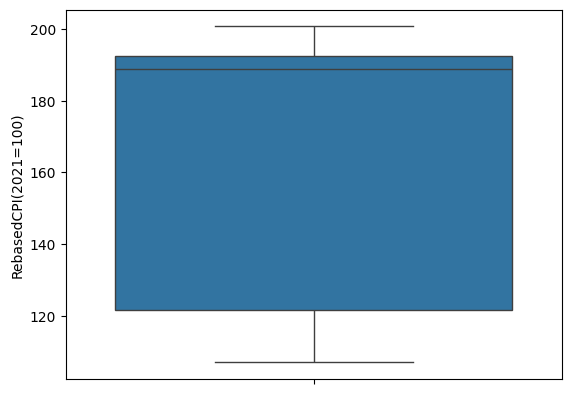

Index(['ShopID', 'OrderID', 'WorkflowID', 'Orderdate', 'Orderconfirmedtime',
       'Diningmode', 'PaymentMode', 'Orderchannel', 'Orderstatus',
       'CustomerUberMembershipStatus', 'Sales(excl.tax)', 'Taxonsales',
       'Refunds(excl.tax)', 'Taxonrefunds', 'Priceadjustments(excl.tax)',
       'Taxonpriceadjustments', 'Promotionsonitems(excltax)',
       'Taxonpromotiononitems', 'Promotionsonitems(incltax)',
       'Deliverycharge(excltax)', 'Taxondeliveryfee',
       'Promotionsondeliverycharge(excltax)',
       'Taxonpromotionsondeliverycharge',
       'Promotionsondeliverycharge(incltax)', 'Bagfee', 'Deliveryfee(excltax)',
       'Taxondeliveryfee.1', 'Deliveryfee(incltax)', 'Servicefee',
       'Taxonservicefee', 'Servicefeediscount', 'Netservicefee',
       'Discountadjustments', 'Profitondelivery', 'Taxadjustment',
       'Otherpaymentsdescription', 'Otherpayments(incl.tax)', 'Totalpayout',
       'Payoutdate', 'Payoutstatus', 'InvoicelinkU2R', 'InvoicelinkC2R',
       'Invoice

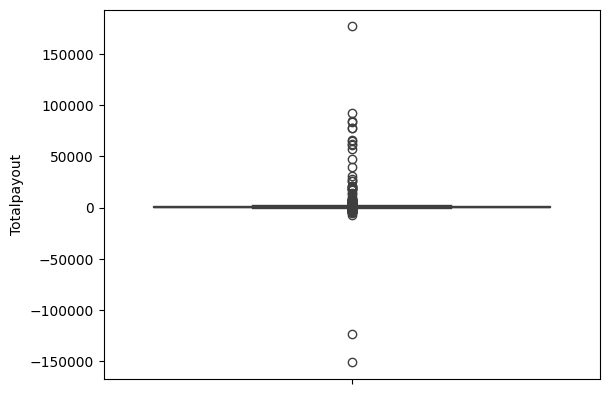

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for CPI, using the correct column name without spaces
sns.boxplot(df_inflation["RebasedCPI(2021=100)"])
plt.show()

# Check the column names in df_sales
print(df_sales.columns)

# Assuming "Totalpayout" is the correct column name without spaces
# (Based on pre-cleaning EDA, "Totalpayout " likely has a trailing space)
sns.boxplot(df_sales["Totalpayout"])
plt.show()

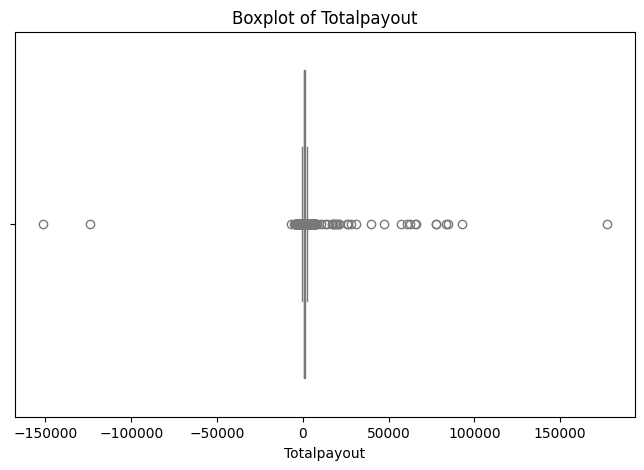

In [277]:
# Boxplot for sales (excluding tax)
plt.figure(figsize=(8,5))
sns.boxplot(x=df_sales["Totalpayout"], color="lightblue")
plt.title("Boxplot of Totalpayout")
plt.show()

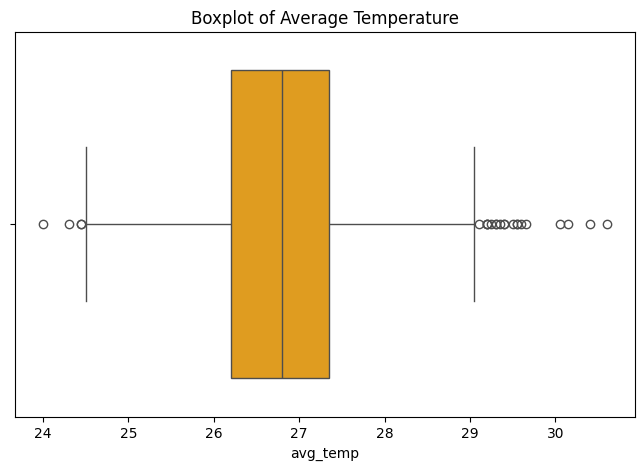

In [278]:
# Calculate average temperature
df_weather['avg_temp'] = (df_weather['temperature_2m_max(°C)'] + df_weather['temperature_2m_min(°C)']) / 2

# Boxplot for average temperature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_weather['avg_temp'], color="orange")
plt.title("Boxplot of Average Temperature")
plt.show()

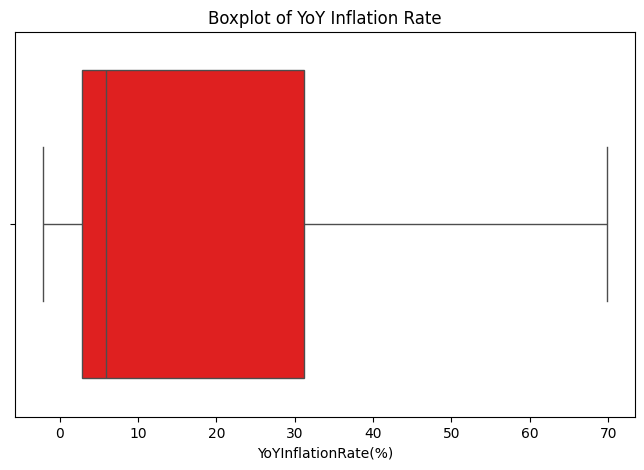

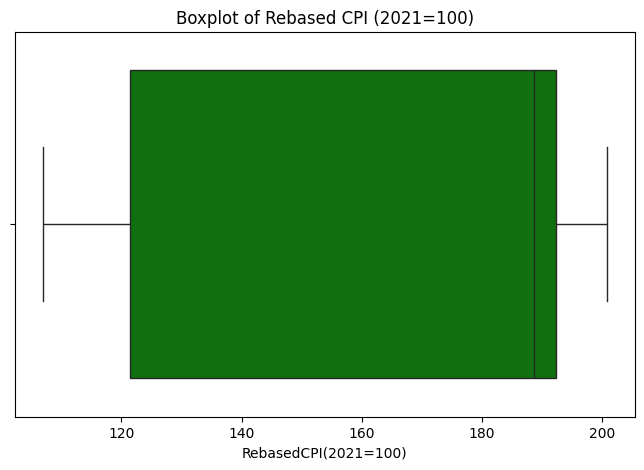

In [279]:
# Create Boxplot for YoY Inflation Rate
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_inflation["YoYInflationRate(%)"], color="red")  # Changed column name
plt.title("Boxplot of YoY Inflation Rate")
plt.show()

# Create Boxplot for Rebased CPI (2021=100)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_inflation["RebasedCPI(2021=100)"], color="green")  # Changed column name
plt.title("Boxplot of Rebased CPI (2021=100)")
plt.show()

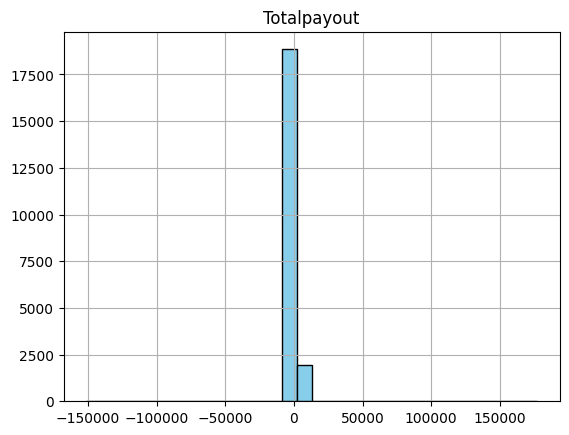

In [280]:
# Histogram for Sales
df_sales["Totalpayout"].hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Totalpayout")
plt.show()


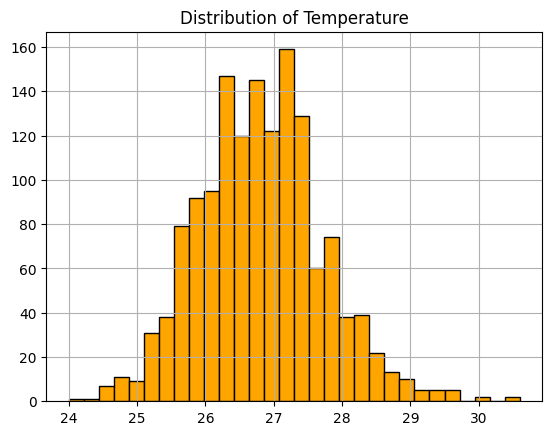

In [281]:
# Histogram for Temperature
df_weather["avg_temp"].hist(bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Temperature")
plt.show()

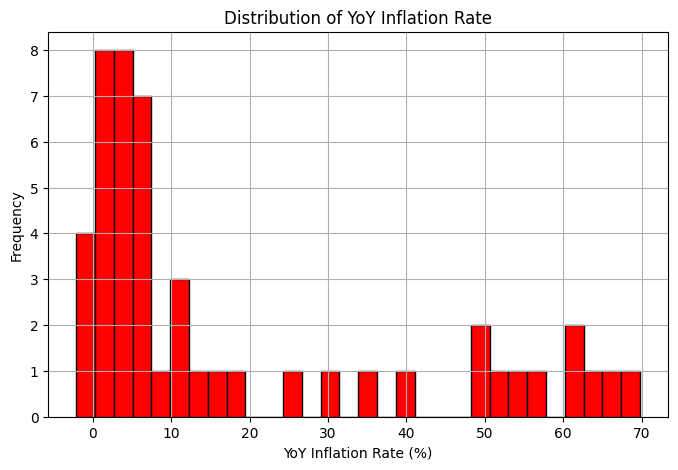

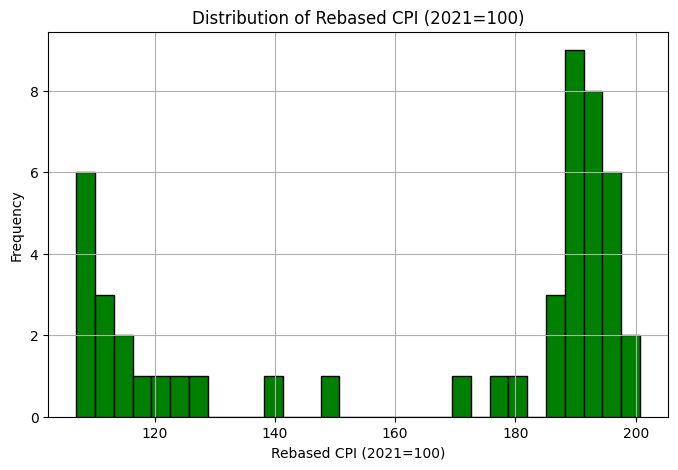

In [282]:
# Create histogram for YoY Inflation Rate
plt.figure(figsize=(8, 5))
# Use the correct column name without spaces "YoYInflationRate(%)"
df_inflation["YoYInflationRate(%)"].hist(bins=30, color="red", edgecolor="black")
plt.title("Distribution of YoY Inflation Rate")
plt.xlabel("YoY Inflation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# Create histogram for Rebased CPI (2021=100)
plt.figure(figsize=(8, 5))
# Use the correct column name without spaces "RebasedCPI(2021=100)"
df_inflation["RebasedCPI(2021=100)"].hist(bins=30, color="green", edgecolor="black")
plt.title("Distribution of Rebased CPI (2021=100)")
plt.xlabel("Rebased CPI (2021=100)")
plt.ylabel("Frequency")
plt.show()

**Data Cleaning**

In [283]:
# Cleaning Sales Data set
# List of columns to drop
columns_to_drop = ['ShopID', 'OrderID', 'WorkflowID', 'PaymentMode', 'Sales(excl.tax)', 'Taxonsales', 'Refunds(excl.tax)', 'Taxonrefunds', 'Priceadjustments(excl.tax)', 'Taxonpriceadjustments', 'Taxonpromotiononitems', 'Promotionsonitems(excltax)', 'Taxondeliveryfee', 'Promotionsondeliverycharge(excltax)', 'Taxonpromotionsondeliverycharge', 'Promotionsondeliverycharge(incltax)','Bagfee','Deliveryfee(excltax)','Taxonservicefee','Discountadjustments','Taxadjustment','Otherpaymentsdescription','Otherpayments(incl.tax)','Payoutdate','Payoutstatus','InvoicelinkU2R','InvoicelinkC2R','InvoicelinkR2E','RetailerLoyaltyID','PayoutreferenceID']

# Drop the specified columns
df_sales = df_sales.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
print(df_sales.head())

   Orderdate Orderconfirmedtime                         Diningmode  \
0 2021-01-01              19:19  Delivery – partner using Uber app   
1 2021-01-01              20:25  Delivery – partner using Uber app   
2 2021-01-01              20:28  Delivery – partner using Uber app   
3 2021-01-02              17:28  Delivery – partner using Uber app   
4 2021-01-02              18:47  Delivery – partner using Uber app   

  Orderchannel Orderstatus CustomerUberMembershipStatus  \
0      Android   Completed           Data not available   
1      Android   Completed           Data not available   
2          iOS   Completed           Data not available   
3      Android   Completed           Data not available   
4          iOS   Completed           Data not available   

   Promotionsonitems(incltax)  Deliverycharge(excltax)  Taxondeliveryfee.1  \
0                         0.0                     80.0                   0   
1                         0.0                     90.0              

In [284]:
# Print the shape of the DataFrame (number of rows, number of columns)
print("Shape of df_sales:", df_sales.shape)

Shape of df_sales: (20839, 15)


In [285]:
# Convert 'Unfulfilled' and 'Cancelled' to 'Completed' while keeping existing 'Completed'
df_sales['Orderstatus'] = df_sales['Orderstatus'].replace(['Unfulfilled', 'Cancelled'], 'Completed')


In [286]:
# Drop rows with 'Refund', 'Refund Disputed', and NaN in 'Orderstatus' (case-insensitive)
df_sales = df_sales[~df_sales['Orderstatus'].str.lower().isin(['refund', 'refund disputed'])]
df_sales = df_sales.dropna(subset=['Orderstatus'])

In [287]:
# Get unique values in the 'Orderstatus' column
unique_order_statuses = df_sales['Orderstatus'].unique()

# Print the unique values
print("Unique Order Statuses:", unique_order_statuses)

Unique Order Statuses: ['Completed']


In [288]:
# Remove duplicate rows and keep the first occurrence
df_sales.drop_duplicates(keep='first', inplace=True)

In [289]:
# Cleaning Weather Data set
# Drop the 'precipitation_sum (mm)' column
df_weather = df_weather.drop(columns=['precipitation_sum(mm)'])

In [290]:
# Remove duplicate rows and keep the first occurrence
df_weather.drop_duplicates(keep='first', inplace=True)

In [291]:
print("\nNull Values in Weather Data:\n", df_weather.isnull().sum())


Null Values in Weather Data:
 Orderdate                         1
weather_code(wmocode)             1
temperature_2m_max(°C)            1
temperature_2m_min(°C)            1
apparent_temperature_max(°C)      1
apparent_temperature_min(°C)      1
sunrise(iso8601)                  1
sunset(iso8601)                   1
rain_sum(mm)                      1
precipitation_hours(h)            1
shortwave_radiation_sum(MJ/m²)    1
avg_temp                          1
dtype: int64


In [292]:
# Assuming 'weather_columns' contains the relevant weather columns:
weather_columns = ['temperature_2m_max(°C)', 'temperature_2m_min(°C)', 'avg_temp']

# Drop rows with null values in any of the 'weather_columns' from df_weather
df_weather.dropna(subset=weather_columns, inplace=True)

In [293]:
# Cleaning Inflation Data Set
# Drop 'Inflation Index(2021=100)' as its been rebased
df_inflation = df_inflation.drop(columns=['InflationIndex(2021=100)'])

In [294]:
print("Duplicate Sales Rows:", df_sales.duplicated().sum())
print("Duplicate Weather Rows:", df_weather.duplicated().sum())
print("Duplicate Inflation Rows:", df_inflation.duplicated().sum())

Duplicate Sales Rows: 0
Duplicate Weather Rows: 0
Duplicate Inflation Rows: 0


In [295]:
# Create copies of df_sales and df_inflation
sales_copy = df_sales.copy()
inflation_copy = df_inflation.copy()

# Set Date as index and resample to daily, forward-filling YoY inflation rates
df_inflation_daily = inflation_copy.set_index("Orderdate").resample("D").ffill().reset_index()
df_inflation_daily.head()

,Orderdate,YoYInflationRate(%),RebasedCPI(2021=100)
0,2021-01-01,3.0,106.990625
1,2021-01-02,3.0,106.990625
2,2021-01-03,3.0,106.990625
3,2021-01-04,3.0,106.990625
4,2021-01-05,3.0,106.990625


In [296]:
print("Null Values in Sales Data:\n", df_sales.isnull().sum())
print("\nNull Values in Weather Data:\n", df_weather.isnull().sum())
print("\nNull Values in Inflation Data:\n", df_inflation.isnull().sum())

Null Values in Sales Data:
 Orderdate                       0
Orderconfirmedtime              0
Diningmode                      0
Orderchannel                    0
Orderstatus                     0
CustomerUberMembershipStatus    0
Promotionsonitems(incltax)      0
Deliverycharge(excltax)         0
Taxondeliveryfee.1              0
Deliveryfee(incltax)            0
Servicefee                      0
Servicefeediscount              0
Netservicefee                   0
Profitondelivery                0
Totalpayout                     0
dtype: int64

Null Values in Weather Data:
 Orderdate                         0
weather_code(wmocode)             0
temperature_2m_max(°C)            0
temperature_2m_min(°C)            0
apparent_temperature_max(°C)      0
apparent_temperature_min(°C)      0
sunrise(iso8601)                  0
sunset(iso8601)                   0
rain_sum(mm)                      0
precipitation_hours(h)            0
shortwave_radiation_sum(MJ/m²)    0
avg_temp              

In [297]:
# Merge daily sales with daily inflation data
df_merged = sales_copy.merge(df_inflation_daily, left_on="Orderdate", right_on="Orderdate", how="left")

# Display merged dataset
df_merged.head()

,Orderdate,Orderconfirmedtime,Diningmode,Orderchannel,Orderstatus,CustomerUberMembershipStatus,Promotionsonitems(incltax),Deliverycharge(excltax),Taxondeliveryfee.1,Deliveryfee(incltax),Servicefee,Servicefeediscount,Netservicefee,Profitondelivery,Totalpayout,YoYInflationRate(%),RebasedCPI(2021=100)
0,2021-01-01,19:19,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,80.0,0,71.73,-300.0,0.0,-300.0,8.27,708.27,3.0,106.990625
1,2021-01-01,20:25,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,76.80,-465.0,0.0,-465.0,13.20,1098.20,3.0,106.990625
2,2021-01-01,20:28,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,60.0,0,49.11,-180.0,0.0,-180.0,10.89,430.89,3.0,106.990625
3,2021-01-02,17:28,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,193.60,-300.0,103.6,-196.4,0.00,700.00,3.0,106.990625
4,2021-01-02,18:47,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,70.0,0,57.15,-1020.0,0.0,-1020.0,12.85,2392.85,3.0,106.990625


In [298]:
df_merged["Real Sales"] = (df_merged["Totalpayout"] / df_merged["RebasedCPI(2021=100)"]) * 100

In [299]:
df_merged.head()

,Orderdate,Orderconfirmedtime,Diningmode,Orderchannel,Orderstatus,CustomerUberMembershipStatus,Promotionsonitems(incltax),Deliverycharge(excltax),Taxondeliveryfee.1,Deliveryfee(incltax),Servicefee,Servicefeediscount,Netservicefee,Profitondelivery,Totalpayout,YoYInflationRate(%),RebasedCPI(2021=100),Real Sales
0,2021-01-01,19:19,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,80.0,0,71.73,-300.0,0.0,-300.0,8.27,708.27,3.0,106.990625,661.992581
1,2021-01-01,20:25,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,76.80,-465.0,0.0,-465.0,13.20,1098.20,3.0,106.990625,1026.445074
2,2021-01-01,20:28,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,60.0,0,49.11,-180.0,0.0,-180.0,10.89,430.89,3.0,106.990625,402.736221
3,2021-01-02,17:28,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,193.60,-300.0,103.6,-196.4,0.00,700.00,3.0,106.990625,654.262932
4,2021-01-02,18:47,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,70.0,0,57.15,-1020.0,0.0,-1020.0,12.85,2392.85,3.0,106.990625,2236.504367


In [300]:
# Check for null values in df_merged and display the count for each column
print("\nNull Values in df_merged:\n", df_merged.isnull().sum())


Null Values in df_merged:
 Orderdate                         0
Orderconfirmedtime                0
Diningmode                        0
Orderchannel                      0
Orderstatus                       0
CustomerUberMembershipStatus      0
Promotionsonitems(incltax)        0
Deliverycharge(excltax)           0
Taxondeliveryfee.1                0
Deliveryfee(incltax)              0
Servicefee                        0
Servicefeediscount                0
Netservicefee                     0
Profitondelivery                  0
Totalpayout                       0
YoYInflationRate(%)             499
RebasedCPI(2021=100)            499
Real Sales                      499
dtype: int64


In [301]:
# Create copies of df_sales and df_inflation
sales_copy = df_sales.copy()
inflation_copy = df_inflation.copy()

# Set Date as index and resample to daily, INTERPOLATING YoY inflation rates
df_inflation_daily = inflation_copy.set_index("Orderdate").resample("D").interpolate().reset_index()
df_inflation_daily.head()

# Ensure date consistency
sales_copy['Orderdate'] = pd.to_datetime(sales_copy['Orderdate']).dt.date
df_inflation_daily['Orderdate'] = pd.to_datetime(df_inflation_daily['Orderdate']).dt.date

# Merge with Sales Data
df_merged = sales_copy.merge(df_inflation_daily, on='Orderdate', how='left')


In [302]:
print("\nNull Values in df_merged:\n", df_merged.isnull().sum())


Null Values in df_merged:
 Orderdate                         0
Orderconfirmedtime                0
Diningmode                        0
Orderchannel                      0
Orderstatus                       0
CustomerUberMembershipStatus      0
Promotionsonitems(incltax)        0
Deliverycharge(excltax)           0
Taxondeliveryfee.1                0
Deliveryfee(incltax)              0
Servicefee                        0
Servicefeediscount                0
Netservicefee                     0
Profitondelivery                  0
Totalpayout                       0
YoYInflationRate(%)             499
RebasedCPI(2021=100)            499
dtype: int64


In [303]:
df_merged['RebasedCPI(2021=100)'].fillna(df_merged['RebasedCPI(2021=100)'].mean(), inplace=True)
df_merged['YoYInflationRate(%)'].fillna(df_merged['YoYInflationRate(%)'].mean(), inplace=True)''

<ipython-input-303-8bcf4939b7e1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['RebasedCPI(2021=100)'].fillna(df_merged['RebasedCPI(2021=100)'].mean(), inplace=True)
<ipython-input-303-8bcf4939b7e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [304]:
# Ensure date consistency for df_weather
df_weather['Orderdate'] = pd.to_datetime(df_weather['Orderdate']).dt.date

# Merge with weather data
df_final_merged = pd.merge(df_merged, df_weather, on='Orderdate', how='left')

# Verify Null Values
print("\nNull Values in df_final_merged:\n", df_final_merged.isnull().sum())


Null Values in df_final_merged:
 Orderdate                         0
Orderconfirmedtime                0
Diningmode                        0
Orderchannel                      0
Orderstatus                       0
CustomerUberMembershipStatus      0
Promotionsonitems(incltax)        0
Deliverycharge(excltax)           0
Taxondeliveryfee.1                0
Deliveryfee(incltax)              0
Servicefee                        0
Servicefeediscount                0
Netservicefee                     0
Profitondelivery                  0
Totalpayout                       0
YoYInflationRate(%)               0
RebasedCPI(2021=100)              0
weather_code(wmocode)             0
temperature_2m_max(°C)            0
temperature_2m_min(°C)            0
apparent_temperature_max(°C)      0
apparent_temperature_min(°C)      0
sunrise(iso8601)                  0
sunset(iso8601)                   0
rain_sum(mm)                      0
precipitation_hours(h)            0
shortwave_radiation_sum(MJ/m²)

**Post-Cleaning Exploratory Data Analysis (EDA)**

In [305]:
df_final_merged.describe()

,Promotionsonitems(incltax),Deliverycharge(excltax),Taxondeliveryfee.1,Deliveryfee(incltax),Servicefee,Servicefeediscount,Netservicefee,Profitondelivery,Totalpayout,YoYInflationRate(%),RebasedCPI(2021=100),weather_code(wmocode),temperature_2m_max(°C),temperature_2m_min(°C),apparent_temperature_max(°C),apparent_temperature_min(°C),rain_sum(mm),precipitation_hours(h),shortwave_radiation_sum(MJ/m²),avg_temp
count,19498.000000,19498.000000,19498.0,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000
mean,-234.366499,140.906510,0.0,156.249965,-459.386533,43.339997,-416.520134,13.701939,1085.603846,15.374567,160.237212,53.786901,29.471695,24.137358,34.903318,28.198128,9.061914,11.898759,18.756517,26.804526
std,394.360783,63.688087,0.0,113.527140,346.794294,70.720583,347.879840,29.949316,814.191885,20.622573,37.871053,15.491112,1.404003,1.222859,2.061029,1.819486,11.116993,7.275138,4.020106,0.876848
min,-6000.000000,0.000000,0.0,0.000000,-24412.500000,0.000000,-24412.500000,0.000000,0.000000,-2.100000,106.990625,0.000000,25.400000,18.300000,28.800000,19.800000,0.000000,0.000000,4.020000,24.000000
25%,-400.000000,94.000000,0.0,72.905000,-555.000000,0.000000,-525.000000,0.000000,588.000000,2.283333,113.977849,51.000000,28.500000,23.300000,33.600000,27.300000,1.700000,6.000000,16.160000,26.200000
50%,0.000000,126.500000,0.0,133.190000,-382.500000,2.430000,-340.500000,0.000000,910.000000,5.729032,187.883669,61.000000,29.300000,24.200000,34.700000,28.300000,4.500000,12.000000,19.540000,26.750000
75%,0.000000,194.000000,0.0,210.350000,-247.500000,65.195000,-210.000000,13.727500,1316.000000,16.128571,192.300000,63.000000,30.300000,25.000000,36.300000,29.500000,13.100000,18.000000,21.840000,27.350000
max,0.000000,429.000000,0.0,1490.840000,0.000000,1291.840000,0.000000,353.000000,56962.500000,69.800000,200.700000,65.000000,35.400000,27.500000,41.100000,33.800000,108.500000,24.000000,26.150000,30.600000


In [306]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19498 entries, 0 to 20838
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Orderdate                     19498 non-null  datetime64[ns]
 1   Orderconfirmedtime            19498 non-null  object        
 2   Diningmode                    19498 non-null  object        
 3   Orderchannel                  19498 non-null  object        
 4   Orderstatus                   19498 non-null  object        
 5   CustomerUberMembershipStatus  19498 non-null  object        
 6   Promotionsonitems(incltax)    19498 non-null  float64       
 7   Deliverycharge(excltax)       19498 non-null  float64       
 8   Taxondeliveryfee.1            19498 non-null  int64         
 9   Deliveryfee(incltax)          19498 non-null  float64       
 10  Servicefee                    19498 non-null  float64       
 11  Servicefeediscount            194

In [307]:
missing_values = df_sales.isnull().sum()

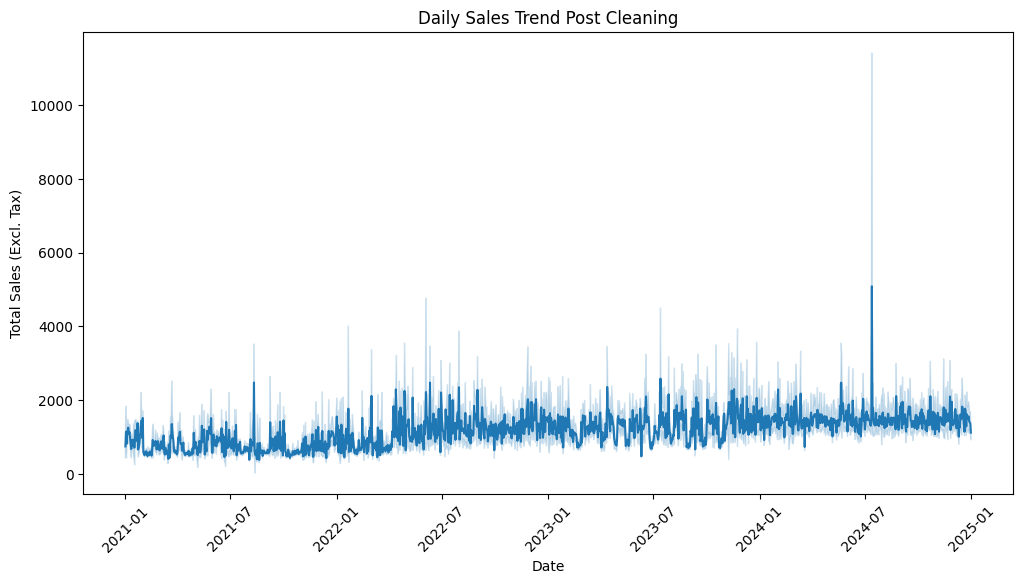

In [308]:
# Visualizing Sales Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=df_sales["Orderdate"], y=df_sales["Totalpayout"])
plt.title("Daily Sales Trend Post Cleaning")
plt.xlabel("Date")
plt.ylabel("Total Sales (Excl. Tax)")
plt.xticks(rotation=45)
plt.show()

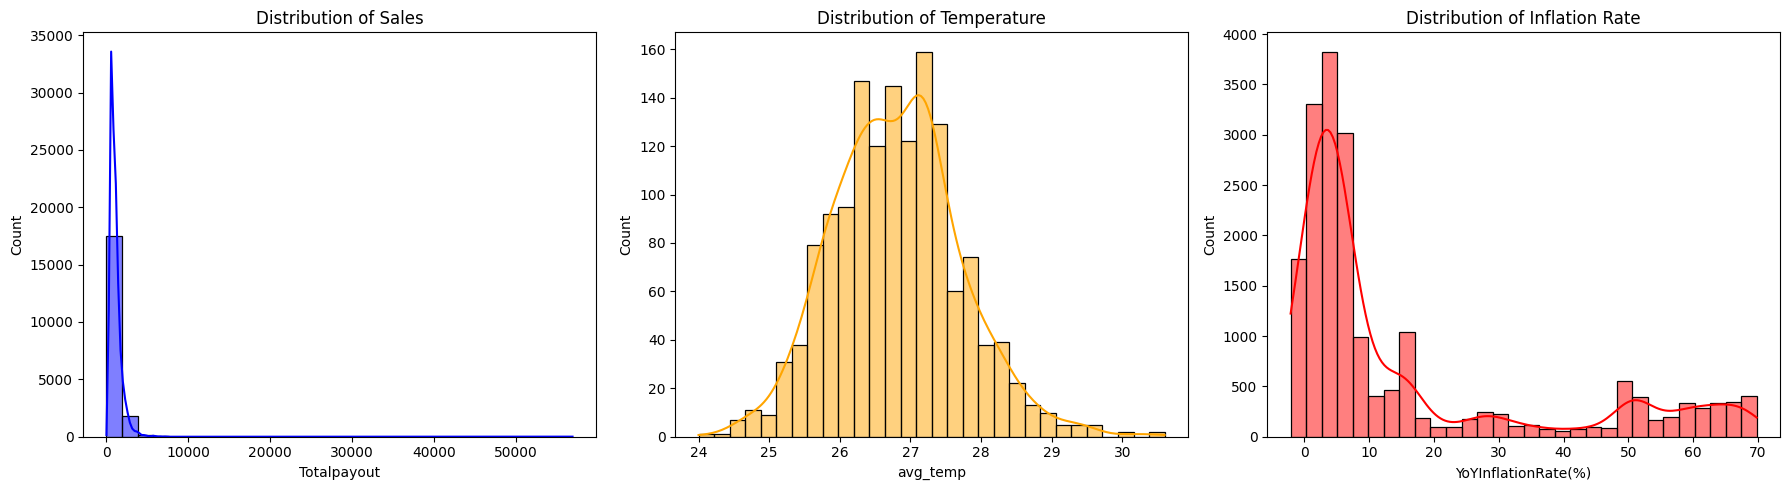

In [309]:
# Distribution of Sales, Temperature, and Inflation Rate
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_sales["Totalpayout"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Sales")

# Use df_weather or df_final_merged instead of df_sales for avg_temp
sns.histplot(df_weather["avg_temp"], bins=30, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Distribution of Temperature")

# Use df_final_merged instead of df_sales if you want combined data
sns.histplot(df_final_merged["YoYInflationRate(%)"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Inflation Rate")

plt.tight_layout()
plt.show()

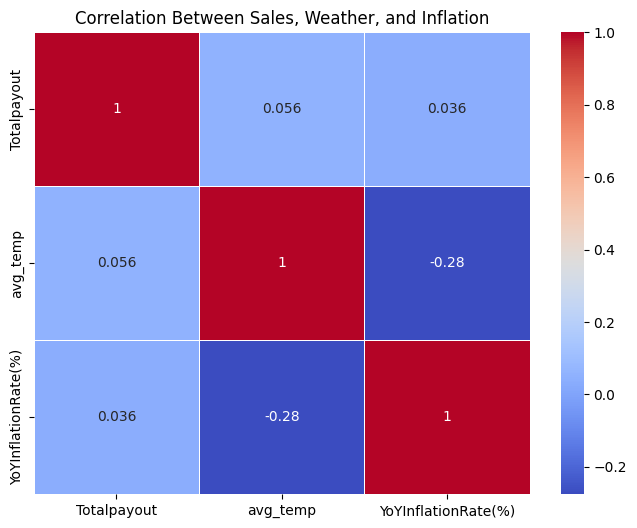

In [310]:
# Correlation Heatmap (Sales, Weather, Inflation)
correlation_matrix = df_final_merged[["Totalpayout", "avg_temp", "YoYInflationRate(%)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Sales, Weather, and Inflation")
plt.show()

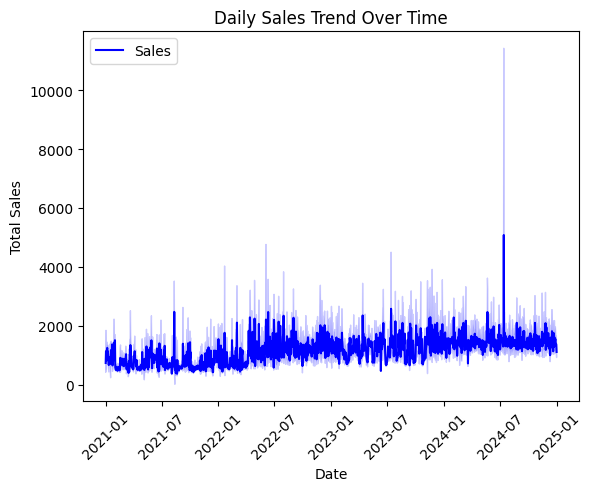

In [316]:
# Plot Sales Trend Over Time
sns.lineplot(x=df_sales["Orderdate"], y=df_sales["Totalpayout"], label="Sales", color="blue")
plt.title("Daily Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")  # Changed to "Total Sales" to reflect the column used
plt.xticks(rotation=45)
plt.legend()
plt.show()

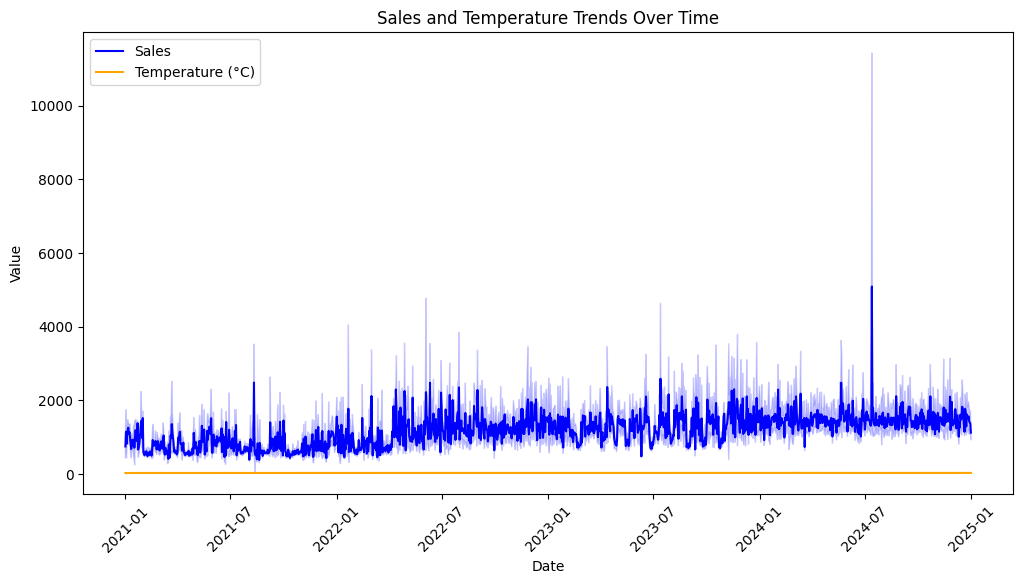

In [317]:
# Plot Sales vs. Temperature Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_final_merged["Orderdate"], y=df_final_merged["Totalpayout"], label="Sales", color="blue")
sns.lineplot(x=df_final_merged["Orderdate"], y=df_final_merged["avg_temp"], label="Temperature (°C)", color="orange")

plt.title("Sales and Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

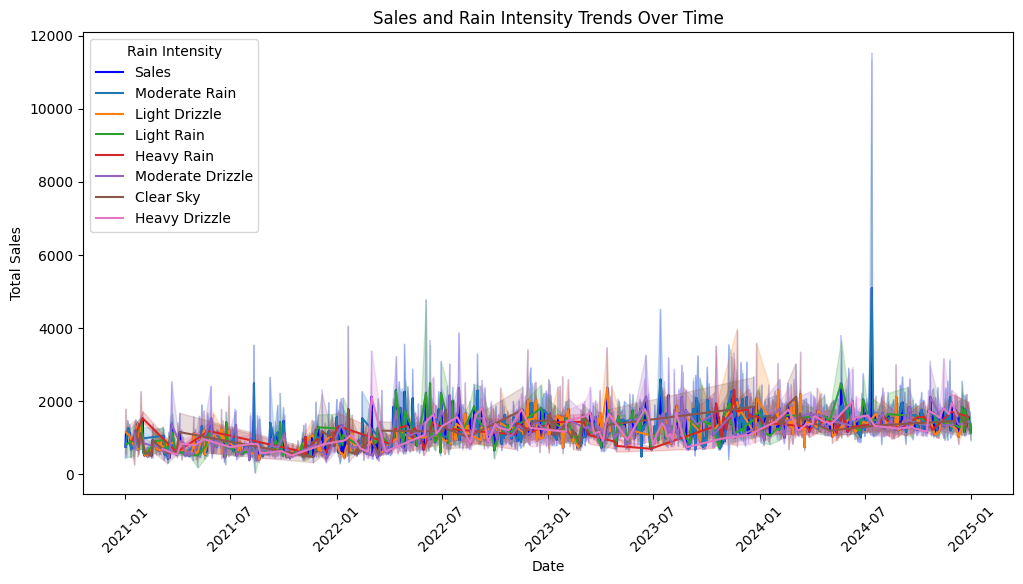

In [318]:
# Plot Sales vs. Rain Intensity Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_final_merged["Orderdate"], y=df_final_merged["Totalpayout"], label="Sales", color="blue")

for intensity in df_final_merged["rain_intensity"].unique():
    sns.lineplot(
        x=df_final_merged[df_final_merged["rain_intensity"] == intensity]["Orderdate"],
        y=df_final_merged[df_final_merged["rain_intensity"] == intensity]["Totalpayout"],
        label=intensity,
    )

plt.title("Sales and Rain Intensity Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Rain Intensity")
plt.show()

In [315]:
# Display the cleaned data for further analysis
display(df_sales.head(5))

,Orderdate,Orderconfirmedtime,Diningmode,Orderchannel,Orderstatus,CustomerUberMembershipStatus,Promotionsonitems(incltax),Deliverycharge(excltax),Taxondeliveryfee.1,Deliveryfee(incltax),Servicefee,Servicefeediscount,Netservicefee,Profitondelivery,Totalpayout
0,2021-01-01,19:19,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,80.0,0,71.73,-300.0,0.0,-300.0,8.27,708.27
1,2021-01-01,20:25,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,76.80,-465.0,0.0,-465.0,13.20,1098.20
2,2021-01-01,20:28,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,60.0,0,49.11,-180.0,0.0,-180.0,10.89,430.89
3,2021-01-02,17:28,Delivery – partner using Uber app,Android,Completed,Data not available,0.0,90.0,0,193.60,-300.0,103.6,-196.4,0.00,700.00
4,2021-01-02,18:47,Delivery – partner using Uber app,iOS,Completed,Data not available,0.0,70.0,0,57.15,-1020.0,0.0,-1020.0,12.85,2392.85
